In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [ ]:
#laoding data
## using kerasgen

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#preprocessing for train &valid data together by this generator
#زودت الارقام هنا
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
#load data splitted
train = datagen.flow_from_directory(
    '/kaggle/input/face-mask-dataset/data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary', # change to catigorical in multiclass
    subset='training', # no need if the folders is splited into train and test
    shuffle=True
)

# Load validation images
val = datagen.flow_from_directory(
    '/kaggle/input/face-mask-dataset/data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
#CNNs are characterized by layers like:
#Conv2D (Convolutional layers)
#MaxPooling2D (Pooling layers)
#BatchNormalization (often used in CNNs)
#Flatten → Dense (for classification after feature extraction)

In [ ]:
model=Sequential()
#Early layers detect simple things: edges, corners → fewer filters needed (e.g. 32 or 64).
#block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.001), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

''' الهدف من هذا "البلوك" ككل:
تُستخرج خصائص جديدة من الصورة بواسطة الـ Conv2D
يتم تحسين التوزيع العددي للخصائص عبر BatchNormalization
ثم يتم تقليص الحجم مع الحفاظ على المعلومات الأهم عن طريق MaxPooling
'''
# Block 2
model.add(Conv2D(128,(3, 3), padding='same', activation='relu',  kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3, 3), padding='same', activation='relu',  kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Fully connected زودت الdence layers
#وباتش نورماليزيشن ودروب اوت
model.add(Flatten()) # Add Flatten layer here
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#(Output Layer) binary output so we use sigmoid
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-4),
            loss='binary_crossentropy',
            metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,184,641 (65.55 MB)

 Trainable params: 17,182,977 (65.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
history=model.fit(train, epochs=20, validation_data=val, callbacks=[early_stop, reduce_lr])


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1002s 5s/step - accuracy: 0.7652 - loss: 1.4977 - val_accuracy: 0.5066 - val_loss: 3.0351 - learning_rate: 1.0000e-04
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 970s 5s/step - accuracy: 0.8111 - loss: 1.3762 - val_accuracy: 0.7609 - val_loss: 1.6423 - learning_rate: 1.0000e-04
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 994s 5s/step - accuracy: 0.8280 - loss: 1.3292 - val_accuracy: 0.7861 - val_loss: 1.5793 - learning_rate: 1.0000e-04
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 997s 5s/step - accuracy: 0.8263 - loss: 1.2759 - val_accuracy: 0.8735 - val_loss: 1.1997 - learning_rate: 1.0000e-04
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.8516 - loss: 1.2173 - val_accuracy: 0.8828 - val_loss: 1.1661 - learning_rate: 1.0000e-04
Epoch 6/20
102/189 ━━━━━━━━━━━━━━━━━━━━ 6:52 5s/step - accuracy: 0.8550 - loss: 1.1750

In [ ]:
test_loss, test_acc = model.evaluate(val)
print(f"\nTest accuracy: {test_acc:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9398 - loss: 0.7103

Test accuracy: 0.9371


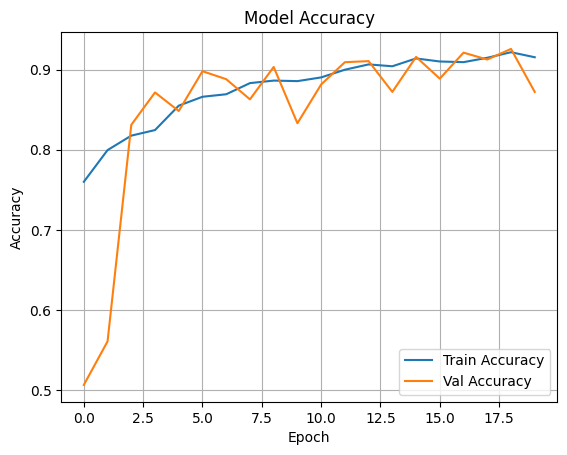

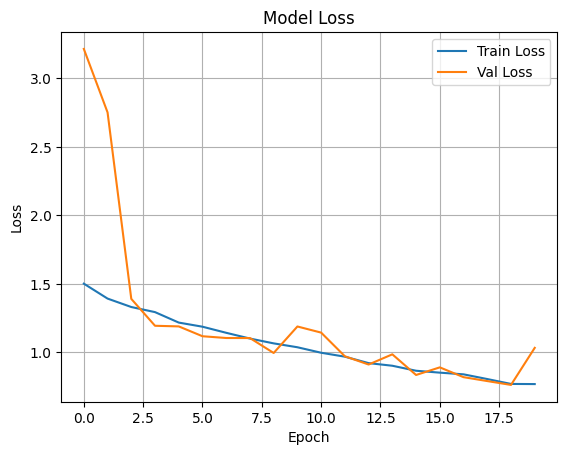

In [ ]:
import matplotlib.pyplot as plt
# رسم الدقة (Accuracy)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# رسم الخسارة (Loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, 'mask_model.h5')

from google.colab import files
files.download('mask_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>